In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
# tf.compat.v1.enable_eager_execution()
# tf.enable_eager_execution()
from tensorflow.compat.v1 import graph_util
from tensorflow.python.keras import backend as K
#tf.compat.v1.enable_eager_execution()
#import time
# import cv2
#import glob

In [2]:
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.applications import VGG19,DenseNet169
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models

# from tensorflow.compat.v1 import graph_util
# from tensorflow.python.keras import backend as K
# tf.compat.v1.disable_eager_execution()
K.set_learning_phase(0)
from matplotlib.pyplot import imshow
from PIL import Image

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

# model = load_model('mobilenet_saved_model')

2.10.0
sys.version_info(major=3, minor=9, micro=18, releaselevel='final', serial=0)
matplotlib 3.8.0
numpy 1.26.0
pandas 2.1.1
sklearn 1.3.0
tensorflow 2.10.0
keras.api._v2.keras 2.10.0


D:\Anaconda root\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\keras\backend.py:437: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [3]:
#设置随机种子
tf.random.uniform([1], seed=1)   #设置为操作级种子

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.2390374], dtype=float32)>

In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
#设置图片的高和宽，一次训练所选取的样本数，迭代次数
im_height = 224
im_width = 224
batch_size = 32
epochs = 100

In [6]:
image_path = "../../../../Data_2000/"  # 数据集路径
train_dir = image_path + "train" #训练集路径
validation_dir = image_path + "valid" #验证集路径
test_dir = image_path + "test" #验证集路径

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 定义训练集图像生成器
train_image_generator = ImageDataGenerator( rescale=1./255, # 归一化
                                            )

In [8]:

# 使用图像生成器从文件夹train_dir中读取样本，对标签进行one-hot编码
train_data_gen = train_image_generator.flow_from_directory(directory=train_dir, #从训练集路径读取图片
                                                           batch_size=batch_size, #一次训练所选取的样本数
                                                           shuffle=True, #打乱标
                                                           #color_mode='grayscale',
                                                           target_size=(im_height, im_width), #图片resize到224x224大
                                                           class_mode='categorical') #one-hot编码
                         

Found 7000 images belonging to 4 classes.


In [9]:
# 训练集样本数        
total_train = train_data_gen.n 

In [10]:
# 定义验证集图像生成器，并对图像进行预处理
validation_image_generator = ImageDataGenerator(rescale=1./255) # 归一化

In [11]:
# 使用图像生成器从验证集validation_dir中读取样本
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,#从验证集路径读取图片
                                                              batch_size=batch_size, #一次训练所选取的样本数
                                                              shuffle=True,  #不打乱标签
                                                              target_size=(im_height, im_width), #图片resize到224x224大小
                                                              #color_mode='grayscale',
                                                              class_mode='categorical') #one-hot编码

Found 278 images belonging to 4 classes.


In [12]:
# 验证集样本数        
total_val = val_data_gen.n 

In [13]:
# 定义测试集图像生成器，并对图像进行预处理
test_image_generator = ImageDataGenerator(rescale=1./255) # 归一化

In [14]:
# 使用图像生成器从测试集test_dir中读取样本
test_data_gen = test_image_generator.flow_from_directory(directory=test_dir,#从测试集路径读取图片
                                                              batch_size=batch_size, #一次训练所选取的样本数
                                                              shuffle=False,  #不打乱标签
                                                              target_size=(im_height, im_width), #图片resize到224x224大小
                                                              #color_mode='grayscale',
                                                              class_mode='categorical') #one-hot编码

Found 278 images belonging to 4 classes.


In [15]:
# 测试集样本数        
total_test = test_data_gen.n 

In [16]:
from mobilenet_v2 import MobileNetV2Improved

#使用tf.keras.applications中的MobileNetV1网络，并且使用官方的预训练模型
# covn_base = tf.keras.applications.MobileNetV1(input_shape=(224,224,3),weights='imagenet',include_top=False)
covn_base = MobileNetV2Improved(input_shape=(224,224,3), include_top=False)
covn_base.trainable = True

#冻结前面的层，训练最后五层
# for layers in covn_base.layers[:-5]:
#     layers.trainable = False
    
#构建模型  
# inputs = tf.keras.layers.Input(shape=(1,1,1,1280))
model = tf.keras.Sequential()
model.add(covn_base)
model.add(tf.keras.layers.GlobalAveragePooling2D()) #加入全局平均池化层
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4,activation='softmax')) #加入输出层(4分类)

#冻结前面的层，训练最后五层
# for layers in covn_base.layers[:-5]:
#     layers.trainable = False

aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa


# D:\anaconda3\envs\ShuffleNet\Lib\site-packages\keras\applications\mobilenet_v2

In [17]:
covn_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [18]:
#生成模型
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 640)        789840    
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 640)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_4 (Dropout)         (None, 640)               0         
                                                                 
 dense (Dense)               (None, 4)                 2564      
                                                                 
Total params: 792,404
Trainable params: 778,820
Non-trainable params: 13,584
_________________________________________________________________


In [19]:
model.trainable_variables

[<tf.Variable 'Conv1/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[-1.71659231e-01, -3.33731920e-01,  5.30122258e-02,
           -5.93232973e-21,  2.08742931e-01, -1.20433941e-01,
            1.75700430e-02, -3.10708203e-22, -9.62498877e-03,
            1.90229788e-01, -3.67278278e-01,  3.95997976e-22,
           -2.36236629e-22,  3.36706383e-22,  8.83555040e-02,
           -7.75416642e-02,  3.95842289e-05, -3.63377742e-02,
            5.99925742e-02,  5.53736472e-21, -4.68022423e-04,
           -1.23387486e-01, -1.34351701e-01,  8.75968020e-03,
           -2.47503355e-01,  1.58492010e-02, -2.43145856e-04,
           -1.09811597e-01,  5.55126644e-22, -2.03368161e-03,
            2.83311605e-01,  7.66634047e-02],
          [-3.18941772e-01, -6.09864295e-01, -1.70770675e-01,
           -6.76705635e-21, -5.82342505e-01, -2.56068230e-01,
           -4.18974347e-02,  1.32427304e-22,  2.00757684e-04,
            3.29488933e-01, -4.01886106e-01,  3.63034420e-22,
            1

In [20]:
#多分类任务指标
#精确率评价指标
def metric_precision(y_true,y_pred): 
      TP=tf.reduce_sum(y_true*tf.round(y_pred))
      TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
      FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
      FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
      precision=TP/(TP+FP)
      return precision

#召回率评价指标
def metric_recall(y_true,y_pred): 
      TP=tf.reduce_sum(y_true*tf.round(y_pred))
      TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
      FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
      FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
      recall=TP/(TP+FN)
      return recall

#F1-score评价指标
def metric_F1score(y_true,y_pred): 
      TP=tf.reduce_sum(y_true*tf.round(y_pred))
      TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
      FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
      FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
      precision=TP/(TP+FP)
      recall=TP/(TP+FN)
      F1score=2*precision*recall/(precision+recall)
      return F1score

In [21]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6), loss='categorical_crossentropy',metrics=["accuracy"])

D:\Anaconda root\envs\tensorflow-gpu\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
import json
from numpyencoder import NumpyEncoder

#训练并保存模型
logdir = os.path.join('MoblieNetV2_graph_def_and_weights')
if not os.path.exists(logdir):
    os.mkdir(logdir)

#保存模型
output_model_file = os.path.join(logdir,"MoblieNetV2_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True,
                                    monitor='val_loss',
                                    save_weights_only = False)
    #keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]

#开始训练
history = model.fit(x=train_data_gen,   #输入训练集
                    steps_per_epoch=total_train // batch_size, #一个epoch包含的训练步数
                    epochs=epochs, #训练模型迭代次数
                    validation_data=val_data_gen,  #输入验证集
                    validation_steps=total_val // batch_size, #一个epoch包含的训练步数
                    callbacks=callbacks) #执行回调函数

Epoch 1/100
218/218 [==============================] - 21s 66ms/step - loss: 0.4461 - accuracy: 0.8416 - val_loss: 6.4611 - val_accuracy: 0.2266
Epoch 2/100
218/218 [==============================] - 14s 63ms/step - loss: 0.1597 - accuracy: 0.9432 - val_loss: 6.9231 - val_accuracy: 0.2383
Epoch 3/100
218/218 [==============================] - 12s 56ms/step - loss: 0.1173 - accuracy: 0.9571 - val_loss: 7.2068 - val_accuracy: 0.2383
Epoch 4/100
218/218 [==============================] - 12s 55ms/step - loss: 0.0997 - accuracy: 0.9640 - val_loss: 4.7867 - val_accuracy: 0.3008
Epoch 5/100
218/218 [==============================] - 12s 55ms/step - loss: 0.0798 - accuracy: 0.9719 - val_loss: 4.1864 - val_accuracy: 0.2734
Epoch 6/100
218/218 [==============================] - 12s 55ms/step - loss: 0.0710 - accuracy: 0.9726 - val_loss: 2.9038 - val_accuracy: 0.3945
Epoch 7/100
218/218 [==============================] - 12s 55ms/step - loss: 0.0647 - accuracy: 0.9765 - val_loss: 2.8185 - val_ac

In [23]:
import pickle

class History_trained_model(object):
    def __init__(self, history, epoch, params):
        self.history = history
        self.epoch = epoch
        self.params = params

with open('history_save', 'wb') as file:
    model_history= History_trained_model(history.history, history.epoch, history.params)
    pickle.dump(model_history, file, pickle.HIGHEST_PROTOCOL)

In [24]:
# import pickle

# with open('history_save', 'rb') as file:
#     history = pickle.load(file)

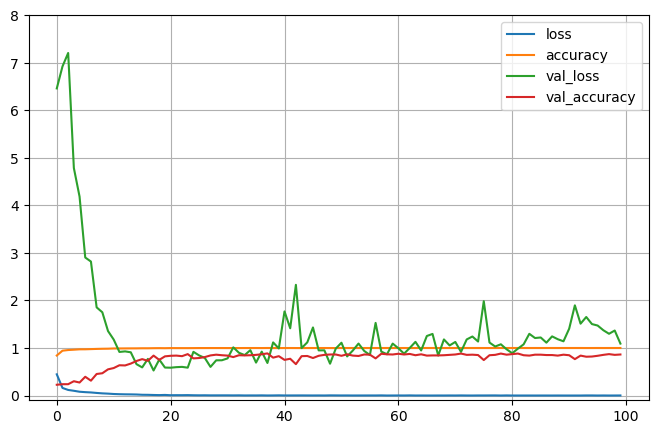

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
#画loss与acc变化曲线
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(-0.1,8)
    plt.savefig("LOSS_ACC_1.png",dpi=720)
    plt.show()

plot_learning_curves(history)

In [26]:
# 记录训练集和验证集的准确率和损失值
history_dict = history.history
# print(history_dict)
train_loss = history_dict["loss"] #训练集损失值
train_accuracy = history_dict["accuracy"] #训练集准确率
val_loss = history_dict["val_loss"] #验证集损失值
val_accuracy = history_dict["val_accuracy"] #验证集准确率

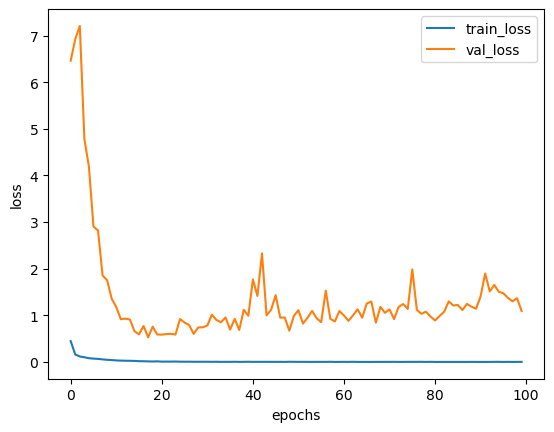

In [27]:
#绘制损失值曲线
plt.figure()
plt.plot(range(epochs), train_loss, label='train_loss')
plt.plot(range(epochs), val_loss, label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig("LOSS_TRAIN_VAL_1.png",dpi=720)

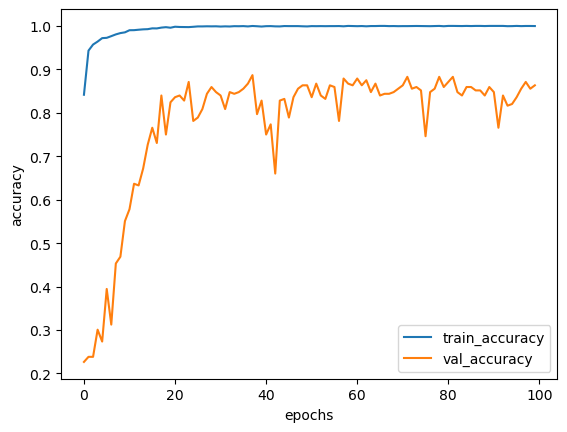

In [28]:
#绘制准确率曲线
plt.figure()
plt.plot(range(epochs), train_accuracy, label='train_accuracy')
plt.plot(range(epochs), val_accuracy, label='val_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.savefig("ACC_TRAIN_VAL_1.png",dpi=720)
plt.show()

In [29]:
#曲线平滑处理
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    #epochs = range(len(acc))
    '''
    plt.plot(epochs,
             smooth_curve(acc), 'bo', label='Smoothed training acc')
    plt.plot(epochs,
             smooth_curve(val_acc), 'b', label='Smoothed validation acc')
    '''
    plt.plot(smooth_curve(acc), 'bo')
    plt.plot(smooth_curve(val_acc), 'b')

    #plt.title('Training and validation accuracy')
    plt.savefig("./accuracy_1.png",dpi=720)
    plt.legend()
    
    plt.figure()
    '''
    plt.plot(epochs,
             smooth_curve(loss), 'go', label='Smoothed training loss')
    plt.plot(epochs,
             smooth_curve(val_loss), 'g', label='Smoothed validation loss')
    '''
    plt.plot(smooth_curve(loss), 'go')
    plt.plot(smooth_curve(val_loss), 'g')

    #plt.title('Training and validation loss')
    plt.savefig("./loss_1.png",dpi=720)
    plt.legend()
    
    plt.figure()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


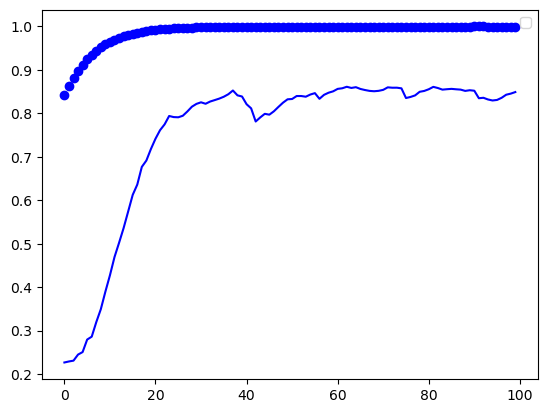

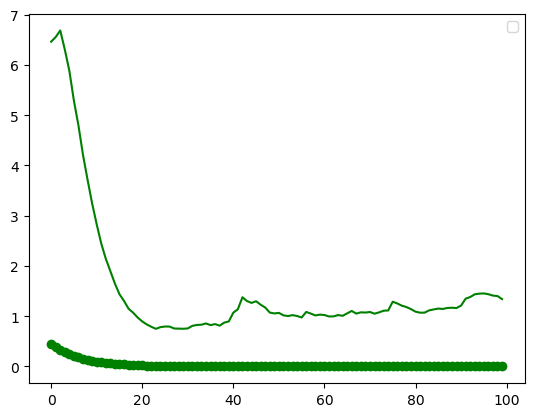

<Figure size 640x480 with 0 Axes>

In [30]:
plot_history(history)

In [31]:
#测试集测试效果评估
test_loss, test_acc = model.evaluate(test_data_gen)
print(test_loss,test_acc)


9/9 [==============================] - 1s 124ms/step - loss: 0.8740 - accuracy: 0.8885
0.8739807605743408 0.8884891867637634


In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report      #分类报告
from sklearn.metrics import accuracy_score             #模型精度
import seaborn as sns

# 预测测试集数据整体准确率
Y_pred = model.predict(test_data_gen)
# 将预测的结果转化为one hot向量
Y_pred_classes = np.argmax(Y_pred, axis = 1)
#测试集分类报告输出
print('测试集分类报告：\n',classification_report(y_true = test_data_gen.classes,y_pred = Y_pred_classes))

9/9 [==============================] - 2s 155ms/step
测试集分类报告：
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       0.91      0.91      0.91        86
           2       0.89      0.80      0.85        92
           3       0.83      0.92      0.87        64

    accuracy                           0.89       278
   macro avg       0.89      0.91      0.90       278
weighted avg       0.89      0.89      0.89       278



In [33]:
#绘制多分类混淆矩阵
#参数 y_true为测试数据集的真实标签，y_pred为网络对测试数据集的预测结果
def plot_confusion_matrix(y_true, y_pred,
                          cmap = plt.cm.Blues, save_flg = False):
    classes = [str(i) for i in range(4)]#参数i的取值范围根据你自己数据集的划分类别来修改，我这儿为4代表数据集共有4类
    labels = range(4)#数据集的标签类别，跟上面I对应
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title, fontsize=18,fontname="Times New Roman")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    # classes表示不同类别的名称，比如这有5个类别
    classes = ['BR', 'LC', 'MC', 'TC']
    plt.xticks(tick_marks, classes, fontsize=10,fontname="Times New Roman")
    plt.yticks(tick_marks, classes, fontsize=10,fontname="Times New Roman")
    print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontname="Times New Roman")
    plt.ylabel('True label', fontsize=14,fontname="Times New Roman")
    plt.xlabel('Predicted label', fontsize=14,fontname="Times New Roman")
    plt.savefig("./confusion_matrix_1.png",dpi=720)
    plt.show()

C:\Users\Yuany\AppData\Local\Temp\ipykernel_8548\2067525869.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_data_gen)  # 样本预测标签


Confusion matrix, without normalization


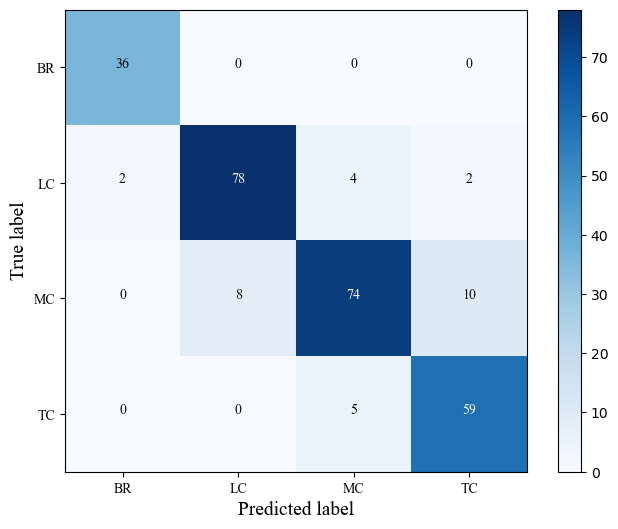

In [34]:
import os,glob,random, csv,itertools
from sklearn.metrics import confusion_matrix

y_true = test_data_gen.classes  # 样本实际标签

 #下面三行代码为绘制混淆矩阵的传参
#predict_classes = model.predict(test_data_gen)#对测试数据集进行预测
#true_classes = np.argmax(predict_classes,1)#汲取预测结果
y_pred = model.predict_generator(test_data_gen)  # 样本预测标签
# 将预测的结果转化为one hot向量
Y_pred = np.argmax(y_pred, axis = 1)

plot_confusion_matrix(y_true, Y_pred, save_flg = True)#调用混淆矩阵

9/9 [==============================] - 1s 155ms/step


C:\Users\Yuany\AppData\Local\Temp\ipykernel_8548\2946851753.py:43: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


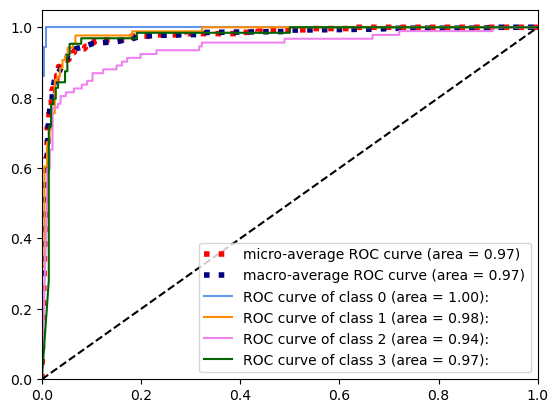

In [35]:
#绘制ROC和AUC曲线
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from scipy import interp
import matplotlib as mpl
from itertools import cycle
# 设置西文字体为新罗马字体
from matplotlib import rcParams

n_classes=4

# 计算属于各个类别的概率，返回值的shape = [n_samples, n_classes]
y_score = model.predict(test_data_gen)
# 将真实标签二值化
y_true = test_data_gen.classes  # 样本实际标签
#y_true = label_binarize(y_true, classes=['axles_2', 'axles_3', 'axles_4', 'axles_5+'])
# y_true = label_binarize(y_true, np.arange(n_classes))
y_true = label_binarize(y_true, classes=np.arange(n_classes))
# print(y_true)


# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=1.5
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='red', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['cornflowerblue','darkorange', 'violet', 'darkgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ':'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate',fontname="Times New Roman")
#plt.ylabel('True Positive Rate',fontname="Times New Roman")
#plt.title('Test ROC and AUC',fontname="Times New Roman")
plt.legend(loc="lower right")
plt.savefig("ROC_AUC_1.png",dpi=720)
plt.show()

9/9 [==============================] - 1s 149ms/step


C:\Users\Yuany\AppData\Local\Temp\ipykernel_8548\3120025124.py:42: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


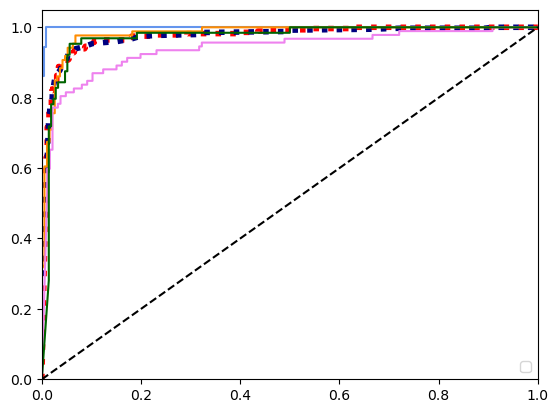

In [36]:
#绘制ROC和AUC曲线
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from scipy import interp
import matplotlib as mpl
from itertools import cycle
# 设置西文字体为新罗马字体
from matplotlib import rcParams

n_classes=4

# 计算属于各个类别的概率，返回值的shape = [n_samples, n_classes]
y_score = model.predict(test_data_gen)
# 将真实标签二值化
y_true = test_data_gen.classes  # 样本实际标签
#y_true = label_binarize(y_true, classes=['axles_2', 'axles_3', 'axles_4', 'axles_5+'])
y_true = label_binarize(y_true, classes=np.arange(n_classes))
# print(y_true)


# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
lw=1.5
plt.figure()

plt.plot(fpr["micro"], tpr["micro"],
         color='red', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['cornflowerblue','darkorange', 'violet', 'darkgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate',fontname="Times New Roman")
#plt.ylabel('True Positive Rate',fontname="Times New Roman")
#plt.title('Test ROC and AUC',fontname="Times New Roman")
plt.legend(loc="lower right")
plt.savefig("ROC_AUC_no label_3.png",dpi=720)
plt.show()

In [37]:
model.save('mobilenet_saved_model')

INFO:tensorflow:Assets written to: mobilenet_saved_model\assets


INFO:tensorflow:Assets written to: mobilenet_saved_model\assets


In [38]:
# import tensorflow as tf
# from tensorflow.compat.v1 import graph_util
# from tensorflow.python.keras import backend as K
# tf.compat.v1.enable_eager_execution()

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('MobileNetV2_model_2.tflite','wb') as fs:
    fs.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Yuany\AppData\Local\Temp\tmpzfcprre2\assets


INFO:tensorflow:Assets written to: C:\Users\Yuany\AppData\Local\Temp\tmpzfcprre2\assets
